## Golbeck model tests

In [1]:
import sklearn.linear_model
import sklearn.ensemble
import pandas as pd
from sklearn import svm
from scipy import interp
from sklearn.metrics import *
from sklearn.cross_validation import StratifiedKFold
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Features file loading

In [2]:
def loadFeatures(file, features_out):

    df = pd.read_json(file, orient='index')
    # y contains all the truth values (0 or 1)
    y = df["truth"]
    # x contains all features except the 'truth'
    x = df[list(filter(lambda x: x not in features_out, df.columns))]
    #print(x)

    print('Training data shape (rows, cols):', x.shape)
    print('Features OUT:', features_out)

    return (x.as_matrix(), y.as_matrix())

## Metrics calculation: Accuracy, Precision, Recall, F1-score, ROC-AUC curve

In [3]:
def metrics_calc(cls, xData, yData):

    #print('Classifier:', cls.)
    plt.figure(figsize=(8, 6))

    # WHY ON yData AND NOT xData?
    cv = StratifiedKFold(yData, n_folds=5)

    # tpr: True Positive rate
    # fpr: False Positive rate
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    mean_accuracy = 0.0
    mean_precision = 0.0
    mean_recall = 0.0
    mean_f1 = 0.0

    mean_optimal_threshold = 0.0

    for i, (train, test) in enumerate(cv):
        #print('Fold', i)
        probas_ = cls.fit(xData[train], yData[train]).predict_proba(xData[test])
        #print(probas_[i])

        # Truth values prediction for metrics calculation
        prediction = cls.fit(xData[train], yData[train]).predict(xData[test])
        #print(prediction[i])

        label = yData[test].astype(float)

        accuracy = accuracy_score(label, prediction)
        precision = precision_score(label, prediction)
        recall = recall_score(label, prediction)
        f1 = f1_score(label, prediction)

        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(yData[test], probas_[:, 1])
        #print(roc_curve(yData[test], probas_[:, 1]))
        roc_auc = auc(fpr, tpr)
        #print(roc_auc)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]

        # Update means
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

        mean_accuracy += accuracy
        mean_precision += precision
        mean_recall += recall
        mean_f1 += f1

        mean_optimal_threshold += optimal_threshold

        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]

    #print(probas_)
    #print(prediction)

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (AUC = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.savefig("data/rocauc.pdf", format="pdf")
    plt.show()


    mean_accuracy /= len(cv)
    print('\nMean ACCURACY:', round(mean_accuracy, 2))
    mean_precision /= len(cv)
    print('Mean PRECISION:', round(mean_precision, 2))
    mean_recall /= len(cv)
    print('Mean RECALL:', round(mean_recall, 2))
    mean_f1 /= len(cv)
    print('Mean F1-SCORE:', round(mean_f1, 2))

    mean_optimal_threshold /= len(cv)
    print('\nMean optimal ROC-AUC threshold:', round(mean_optimal_threshold, 4))


## Golbeck Random Forest (100 trees) (features normalized)

Training data shape (rows, cols): (156, 15)
Features OUT: ['truth']


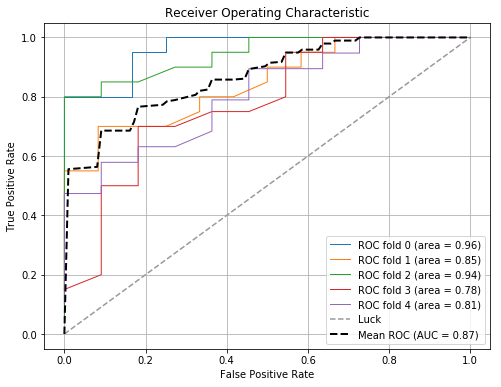


Mean ACCURACY: 0.78
Mean PRECISION: 0.8
Mean RECALL: 0.88
Mean F1-SCORE: 0.84

Mean optimal ROC-AUC threshold: 0.766


In [9]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## Golbeck Random Forest (100 trees) (features NOT normalized)

Training data shape (rows, cols): (156, 15)
Features OUT: ['truth']


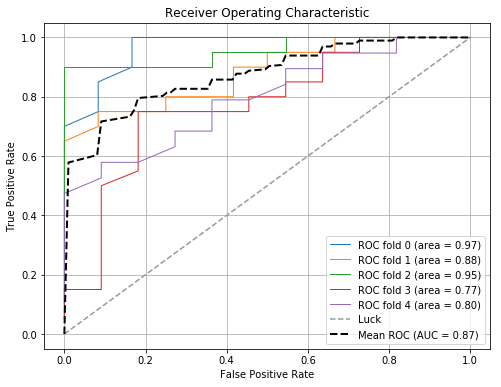


Mean ACCURACY: 0.79
Mean PRECISION: 0.8
Mean RECALL: 0.9
Mean F1-SCORE: 0.85

Mean optimal ROC-AUC threshold: 0.692


In [10]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## Golbeck Random Forest (100 trees) <br\> *SENTIMENT features excluded*

## *NOT normalized*

Training data shape (rows, cols): (156, 13)
Features OUT: ['truth', 'polarity', 'objectivity']


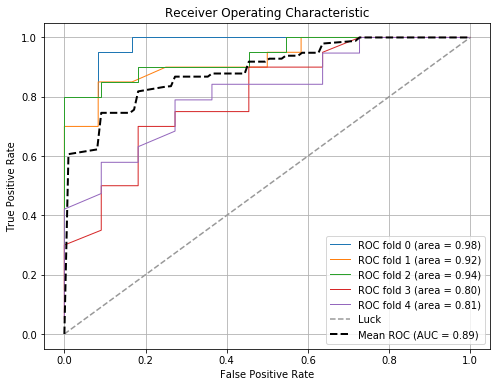

Optimal ROC-AUC threshold: 0.64

Mean ACCURACY: 0.77
Mean PRECISION: 0.79
Mean RECALL: 0.88
Mean F1-SCORE: 0.83


In [7]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
features_out.extend(["polarity", "objectivity"])

# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## *NORMALIZED*

In [8]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
features_out.extend(["polarity", "objectivity"])

# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 13)
Features OUT: ['truth', 'polarity', 'objectivity']


Optimal ROC-AUC threshold: 0.83

Mean ACCURACY: 0.79
Mean PRECISION: 0.81
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


## Golbeck Random Forest (100 trees) <br\> *TWEETS features excluded*

## *NOT normalized*

Training data shape (rows, cols): (156, 9)
Features OUT: ['truth', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count']


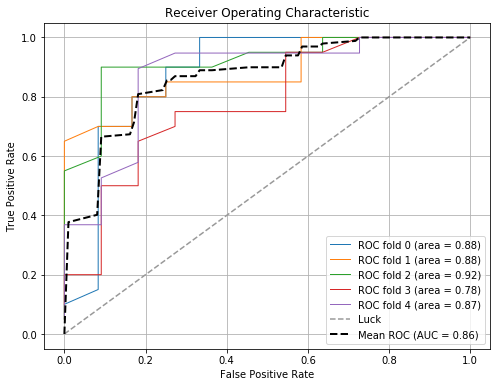

Optimal ROC-AUC threshold: 0.66

Mean ACCURACY: 0.79
Mean PRECISION: 0.79
Mean RECALL: 0.9
Mean F1-SCORE: 0.84


In [9]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])

# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])

# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## *NORMALIZED*

In [10]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])

# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])

# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 9)
Features OUT: ['truth', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count']


Optimal ROC-AUC threshold: 0.61

Mean ACCURACY: 0.8
Mean PRECISION: 0.82
Mean RECALL: 0.88
Mean F1-SCORE: 0.85


## Golbeck Random Forest (100 trees) <br\> *THREAD features excluded*

## *NOT normalized*

Training data shape (rows, cols): (156, 11)
Features OUT: ['truth', 'ages', 'lifespan', 'tweetCount', 'density']


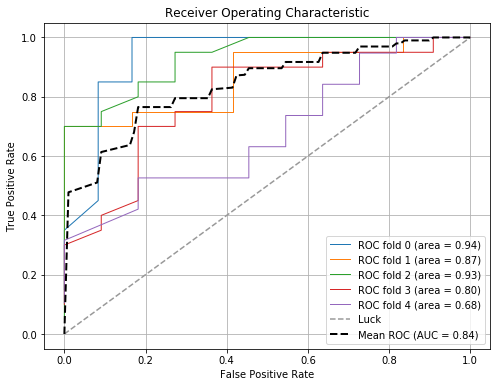

Optimal ROC-AUC threshold: 0.88

Mean ACCURACY: 0.76
Mean PRECISION: 0.79
Mean RECALL: 0.85
Mean F1-SCORE: 0.82


In [11]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## *NORMALIZED*

In [12]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 11)
Features OUT: ['truth', 'ages', 'lifespan', 'tweetCount', 'density']


Optimal ROC-AUC threshold: 0.84

Mean ACCURACY: 0.76
Mean PRECISION: 0.79
Mean RECALL: 0.86
Mean F1-SCORE: 0.82


## Golbeck Random Forest (100 trees) <br\> *USER features excluded*

## *NOT normalized*

Training data shape (rows, cols): (156, 12)
Features OUT: ['truth', 'verified', 'followers', 'friends']


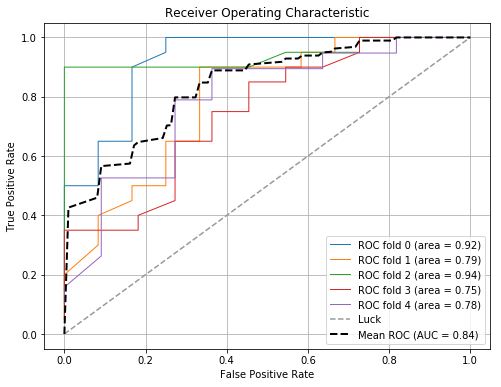

Optimal ROC-AUC threshold: 0.47

Mean ACCURACY: 0.79
Mean PRECISION: 0.81
Mean RECALL: 0.89
Mean F1-SCORE: 0.85


In [13]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## *NORMALIZED*

Training data shape (rows, cols): (156, 12)
Features OUT: ['truth', 'verified', 'followers', 'friends']


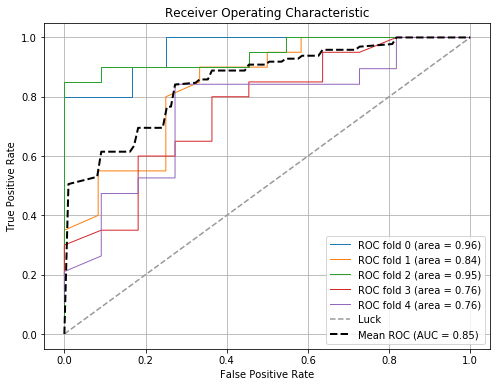

Optimal ROC-AUC threshold: 0.58

Mean ACCURACY: 0.8
Mean PRECISION: 0.82
Mean RECALL: 0.88
Mean F1-SCORE: 0.85


In [14]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## Golbeck Random Forest (100 trees) <br\> * SENTIMENT and TWEETS features excluded*

## *NOT normalized*

In [15]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]

# SENTIMENT features
features_out.extend(["polarity", "objectivity"])
# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])

# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 7)
Features OUT: ['truth', 'polarity', 'objectivity', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count']


Optimal ROC-AUC threshold: 0.58

Mean ACCURACY: 0.78
Mean PRECISION: 0.8
Mean RECALL: 0.89
Mean F1-SCORE: 0.84


## *NORMALIZED*

In [16]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]

# SENTIMENT features
features_out.extend(["polarity", "objectivity"])
# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])

# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 7)
Features OUT: ['truth', 'polarity', 'objectivity', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count']


Optimal ROC-AUC threshold: 0.62

Mean ACCURACY: 0.78
Mean PRECISION: 0.8
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


## Golbeck Random Forest (100 trees) <br\> *SENTIMENT and THREAD features excluded*

## *NOT normalized*

Training data shape (rows, cols): (156, 9)
Features OUT: ['truth', 'polarity', 'objectivity', 'ages', 'lifespan', 'tweetCount', 'density']


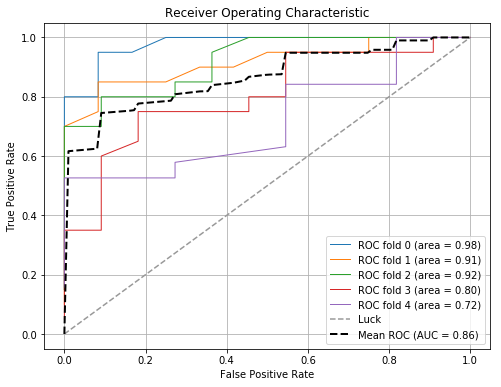

Optimal ROC-AUC threshold: 0.93

Mean ACCURACY: 0.77
Mean PRECISION: 0.79
Mean RECALL: 0.88
Mean F1-SCORE: 0.83


In [17]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## *NORMALIZED*

In [18]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 9)
Features OUT: ['truth', 'polarity', 'objectivity', 'ages', 'lifespan', 'tweetCount', 'density']


Optimal ROC-AUC threshold: 0.91

Mean ACCURACY: 0.81
Mean PRECISION: 0.83
Mean RECALL: 0.88
Mean F1-SCORE: 0.85


## Golbeck Random Forest (100 trees) <br\> *SENTIMENT and USER features excluded*

## *NOT normalized*

Training data shape (rows, cols): (156, 10)
Features OUT: ['truth', 'polarity', 'objectivity', 'verified', 'followers', 'friends']


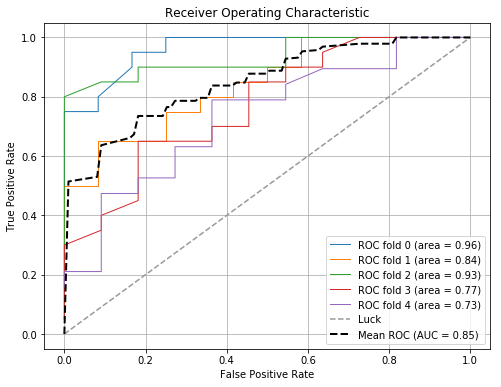

Optimal ROC-AUC threshold: 0.61

Mean ACCURACY: 0.79
Mean PRECISION: 0.81
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


In [19]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## *NORMALIZED*

In [20]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 10)
Features OUT: ['truth', 'polarity', 'objectivity', 'verified', 'followers', 'friends']


Optimal ROC-AUC threshold: 0.52

Mean ACCURACY: 0.81
Mean PRECISION: 0.82
Mean RECALL: 0.89
Mean F1-SCORE: 0.85


## Golbeck Random Forest (100 trees) <br\> *TWEETS and THREAD features excluded*

## *NOT normalized*

In [21]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 5)
Features OUT: ['truth', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count', 'ages', 'lifespan', 'tweetCount', 'density']


Optimal ROC-AUC threshold: 0.58

Mean ACCURACY: 0.76
Mean PRECISION: 0.81
Mean RECALL: 0.85
Mean F1-SCORE: 0.82


## *NORMALIZED*

Training data shape (rows, cols): (156, 5)
Features OUT: ['truth', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count', 'ages', 'lifespan', 'tweetCount', 'density']


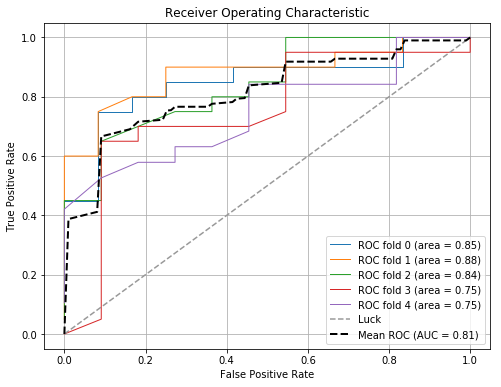

Optimal ROC-AUC threshold: 0.83

Mean ACCURACY: 0.76
Mean PRECISION: 0.8
Mean RECALL: 0.85
Mean F1-SCORE: 0.82


In [22]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
#features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## Golbeck Random Forest (100 trees) <br\> *TWEETS and USER features excluded*

## *NOT normalized*

Training data shape (rows, cols): (156, 6)
Features OUT: ['truth', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count', 'verified', 'followers', 'friends']


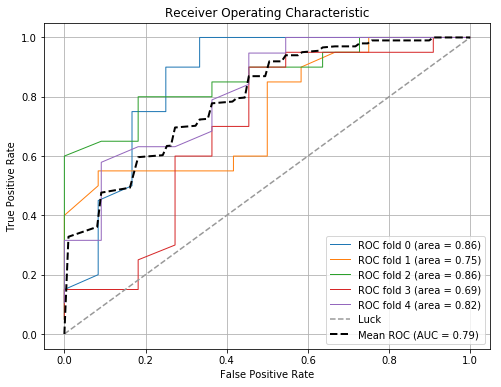

Optimal ROC-AUC threshold: 0.42

Mean ACCURACY: 0.76
Mean PRECISION: 0.78
Mean RECALL: 0.86
Mean F1-SCORE: 0.82


In [23]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## *NORMALIZED*

In [24]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
#features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 6)
Features OUT: ['truth', 'mediaCount', 'mentionCount', 'urlCount', 'retweetCount', 'hashtagCount', 'status_count', 'verified', 'followers', 'friends']


Optimal ROC-AUC threshold: 0.68

Mean ACCURACY: 0.77
Mean PRECISION: 0.79
Mean RECALL: 0.87
Mean F1-SCORE: 0.83


## Golbeck Random Forest (100 trees) <br\> *THREAD and USER features excluded*

## *NOT normalized*

In [25]:
jsonFile = 'data/credbank_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()v

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 8)
Features OUT: ['truth', 'ages', 'lifespan', 'tweetCount', 'density', 'verified', 'followers', 'friends']


Optimal ROC-AUC threshold: 0.86

Mean ACCURACY: 0.77
Mean PRECISION: 0.81
Mean RECALL: 0.86
Mean F1-SCORE: 0.83


## *NORMALIZED*

Training data shape (rows, cols): (156, 8)
Features OUT: ['truth', 'ages', 'lifespan', 'tweetCount', 'density', 'verified', 'followers', 'friends']


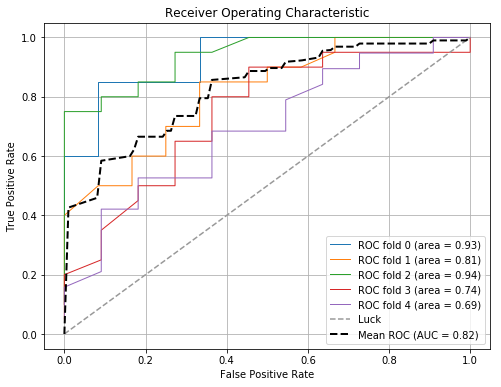

Optimal ROC-AUC threshold: 0.86

Mean ACCURACY: 0.79
Mean PRECISION: 0.81
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


In [26]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
# SENTIMENT features
#features_out.extend(["polarity", "objectivity"])
# TWEETS features
#features_out.extend(["mediaCount", "mentionCount", "urlCount", "retweetCount", "hashtagCount", "status_count"])
# THREAD features
features_out.extend(["ages", "lifespan", "tweetCount", "density"])
# USER features
features_out.extend(["verified", "followers", "friends"])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

# Logistic Regression
#cls = sklearn.linear_model.LogisticRegression()v

# SVM
#cls = svm.SVC(kernel='linear', probability=True)

# Gaussian Naive Bayes
#cls = GaussianNB()

# Bernoulli Naive Bayes
#cls = BernoulliNB()

metrics_calc(cls, xData, yData)

## Features ranking

### Feature excluded: *Ages*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'ages']


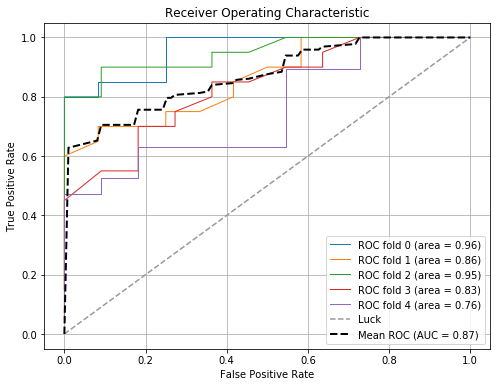

Optimal ROC-AUC threshold: 0.88

Mean ACCURACY: 0.79
Mean PRECISION: 0.81
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


In [27]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *density*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'density']


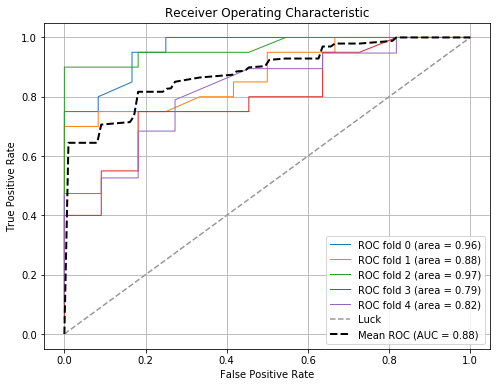

Optimal ROC-AUC threshold: 0.59

Mean ACCURACY: 0.79
Mean PRECISION: 0.8
Mean RECALL: 0.9
Mean F1-SCORE: 0.85


In [28]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['density'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *followers*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'followers']


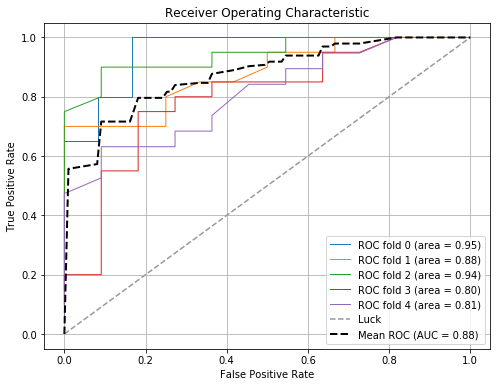

Optimal ROC-AUC threshold: 0.71

Mean ACCURACY: 0.79
Mean PRECISION: 0.8
Mean RECALL: 0.89
Mean F1-SCORE: 0.84


In [29]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['followers'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *friends*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'friends']


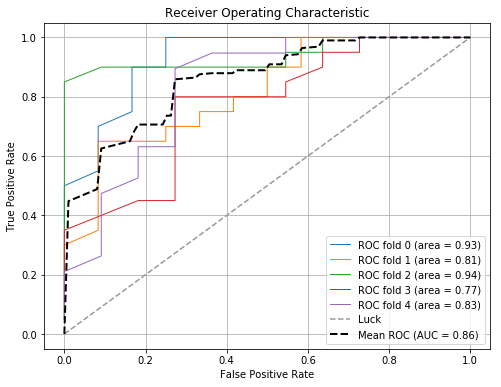

Optimal ROC-AUC threshold: 0.48

Mean ACCURACY: 0.81
Mean PRECISION: 0.82
Mean RECALL: 0.89
Mean F1-SCORE: 0.85


In [30]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['friends'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *hashtagCount*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'hashtagCount']


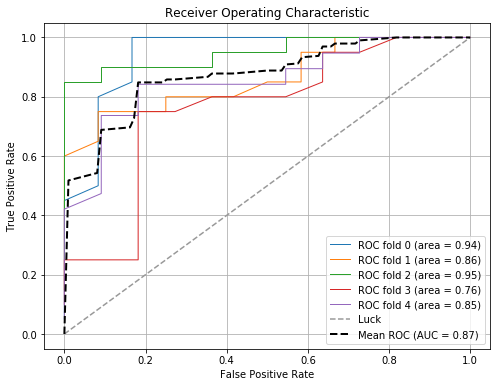

Optimal ROC-AUC threshold: 0.65

Mean ACCURACY: 0.78
Mean PRECISION: 0.8
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


In [31]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['hashtagCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *lifespan*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'lifespan']


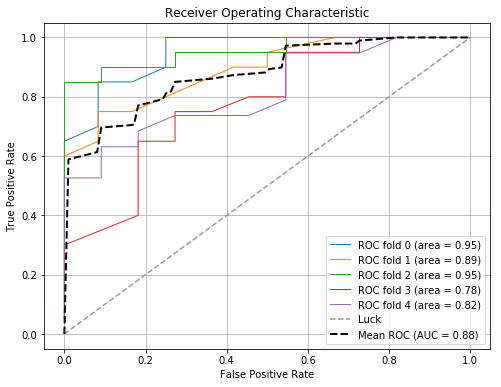

Optimal ROC-AUC threshold: 0.79

Mean ACCURACY: 0.78
Mean PRECISION: 0.8
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


In [32]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['lifespan'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *mediaCount*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'mediaCount']


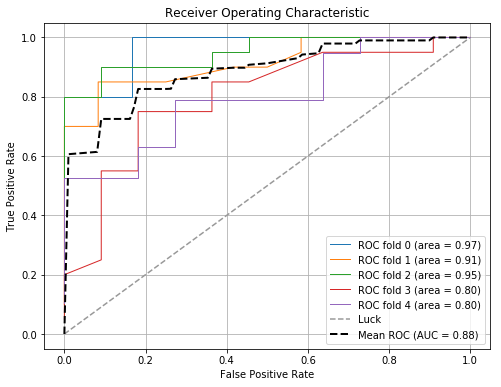

Optimal ROC-AUC threshold: 0.86

Mean ACCURACY: 0.79
Mean PRECISION: 0.8
Mean RECALL: 0.9
Mean F1-SCORE: 0.85


In [33]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['mediaCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *mentionCount*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'mentionCount']


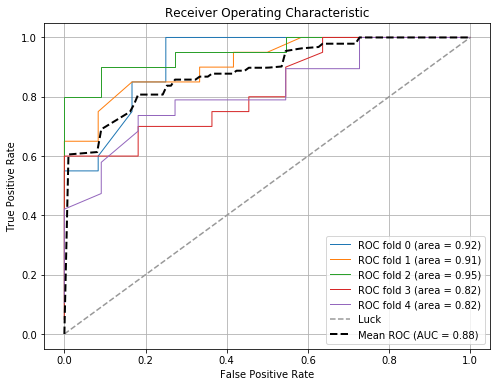

Optimal ROC-AUC threshold: 0.72

Mean ACCURACY: 0.78
Mean PRECISION: 0.8
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


In [34]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['mentionCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *objectivity*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'objectivity']


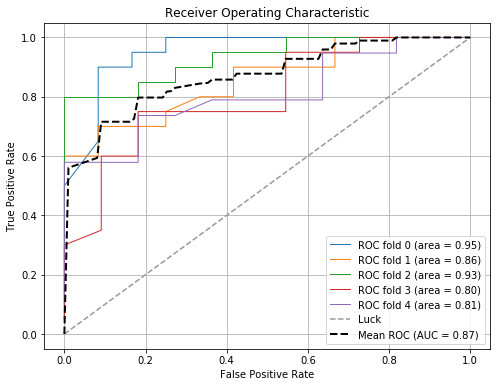

Optimal ROC-AUC threshold: 0.81

Mean ACCURACY: 0.76
Mean PRECISION: 0.78
Mean RECALL: 0.88
Mean F1-SCORE: 0.82


In [35]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['objectivity'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *polarity*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'polarity']


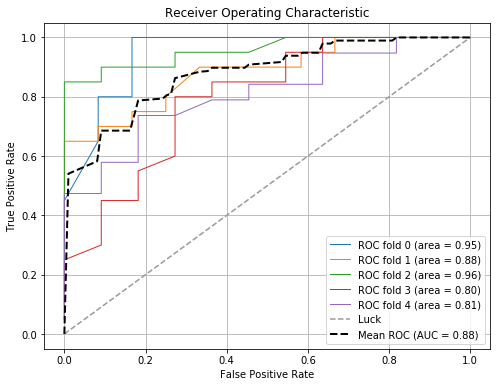

Optimal ROC-AUC threshold: 0.66

Mean ACCURACY: 0.77
Mean PRECISION: 0.78
Mean RECALL: 0.88
Mean F1-SCORE: 0.83


In [36]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['polarity'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *retweetCount*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'retweetCount']


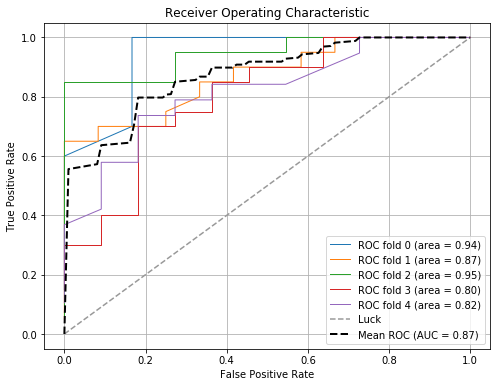

Optimal ROC-AUC threshold: 0.64

Mean ACCURACY: 0.79
Mean PRECISION: 0.81
Mean RECALL: 0.89
Mean F1-SCORE: 0.84


In [37]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['retweetCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *status_count*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'status_count']


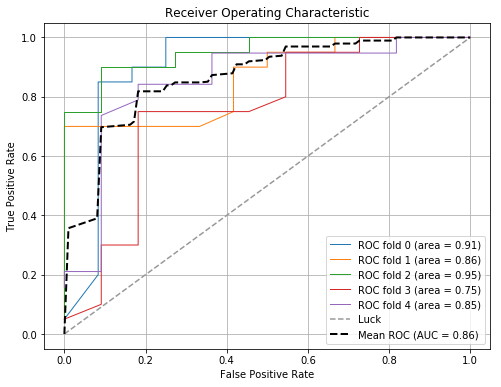

Optimal ROC-AUC threshold: 0.67

Mean ACCURACY: 0.78
Mean PRECISION: 0.8
Mean RECALL: 0.88
Mean F1-SCORE: 0.84


In [38]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['status_count'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *tweetCount*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'tweetCount']


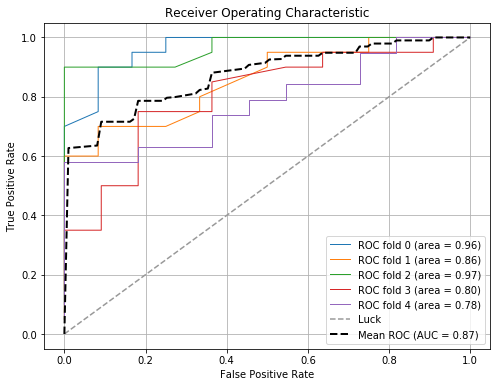

Optimal ROC-AUC threshold: 0.83

Mean ACCURACY: 0.77
Mean PRECISION: 0.79
Mean RECALL: 0.89
Mean F1-SCORE: 0.83


In [39]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['tweetCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *urlCount*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'urlCount']


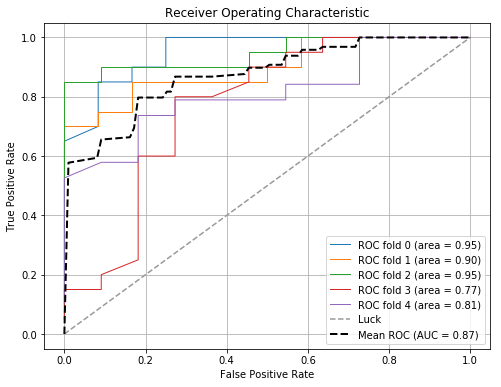

Optimal ROC-AUC threshold: 0.63

Mean ACCURACY: 0.78
Mean PRECISION: 0.79
Mean RECALL: 0.89
Mean F1-SCORE: 0.84


In [40]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['urlCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *verified*

Training data shape (rows, cols): (156, 14)
Features OUT: ['truth', 'verified']


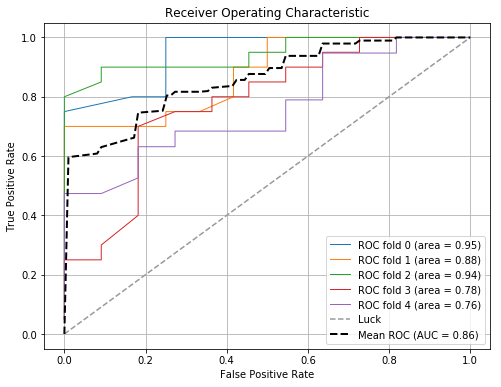

Optimal ROC-AUC threshold: 0.87

Mean ACCURACY: 0.77
Mean PRECISION: 0.79
Mean RECALL: 0.87
Mean F1-SCORE: 0.83


In [41]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

## Feature OUT Training

### Feature excluded: *ages*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'ages']


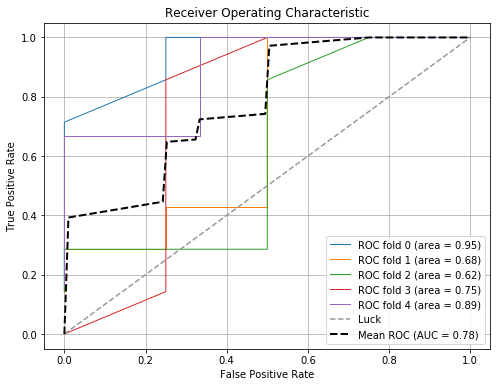


Mean ACCURACY: 0.72
Mean PRECISION: 0.77
Mean RECALL: 0.83
Mean F1-SCORE: 0.79

Mean optimal ROC-AUC threshold: 0.564


In [11]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['ages'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *density*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'density']


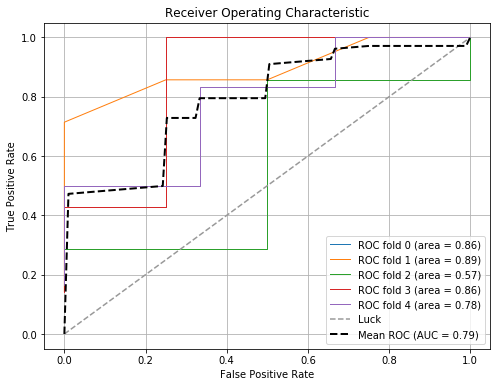


Mean ACCURACY: 0.75
Mean PRECISION: 0.78
Mean RECALL: 0.89
Mean F1-SCORE: 0.82

Mean optimal ROC-AUC threshold: 0.586


In [12]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['density'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *followers*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'followers']


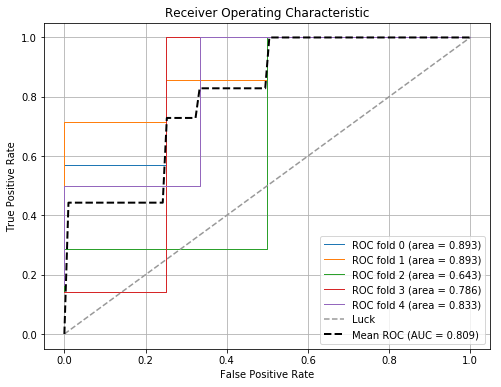

Optimal ROC-AUC threshold: 0.6

Mean ACCURACY: 0.75
Mean PRECISION: 0.77
Mean RECALL: 0.91
Mean F1-SCORE: 0.83


In [66]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['followers'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *friends*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'friends']


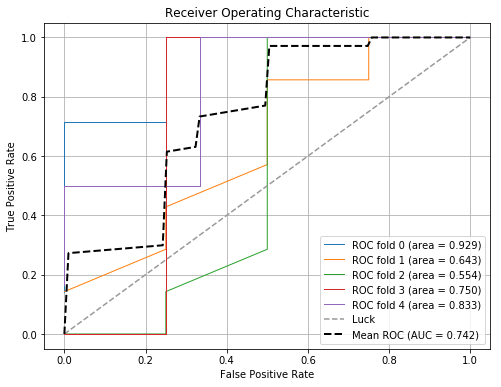

Optimal ROC-AUC threshold: 0.52

Mean ACCURACY: 0.74
Mean PRECISION: 0.79
Mean RECALL: 0.82
Mean F1-SCORE: 0.8


In [67]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['friends'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *hashtagCount*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'hashtagCount']


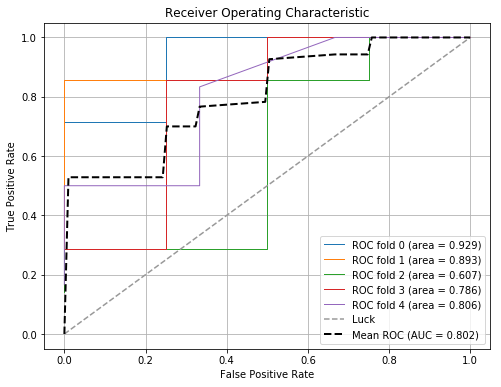

Optimal ROC-AUC threshold: 0.92

Mean ACCURACY: 0.73
Mean PRECISION: 0.76
Mean RECALL: 0.89
Mean F1-SCORE: 0.81


In [68]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['hashtagCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *lifespan*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'lifespan']


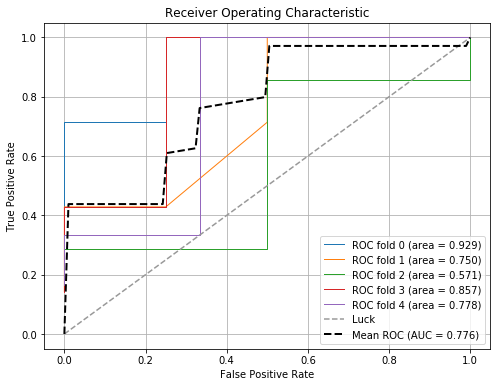

Optimal ROC-AUC threshold: 0.58

Mean ACCURACY: 0.75
Mean PRECISION: 0.78
Mean RECALL: 0.89
Mean F1-SCORE: 0.82


In [69]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['lifespan'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *mediaCount*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'mediaCount']


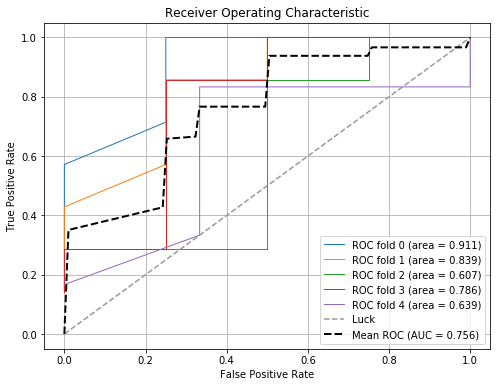

Optimal ROC-AUC threshold: 0.84

Mean ACCURACY: 0.72
Mean PRECISION: 0.76
Mean RECALL: 0.83
Mean F1-SCORE: 0.78


In [70]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['mediaCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *mentionCount*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'mentionCount']


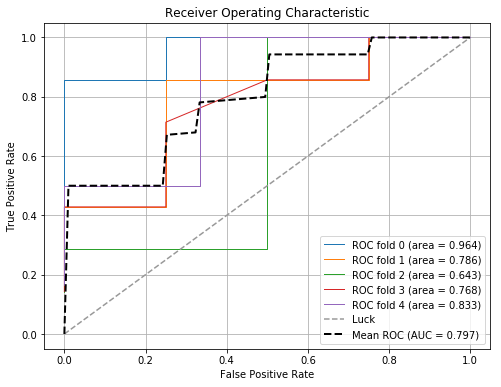

Optimal ROC-AUC threshold: 0.69

Mean ACCURACY: 0.76
Mean PRECISION: 0.79
Mean RECALL: 0.86
Mean F1-SCORE: 0.82


In [71]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['mentionCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *objectivity*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'objectivity']


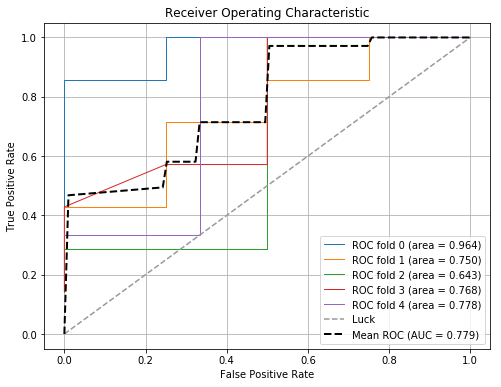

Optimal ROC-AUC threshold: 0.65

Mean ACCURACY: 0.72
Mean PRECISION: 0.75
Mean RECALL: 0.86
Mean F1-SCORE: 0.79


In [72]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['objectivity'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *polarity*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'polarity']


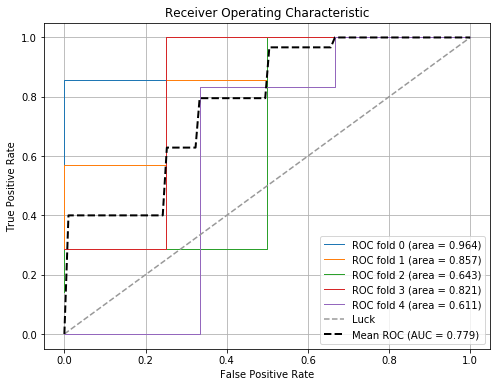

Optimal ROC-AUC threshold: 0.83

Mean ACCURACY: 0.76
Mean PRECISION: 0.77
Mean RECALL: 0.89
Mean F1-SCORE: 0.82


In [73]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['polarity'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *retweetCount*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'retweetCount']


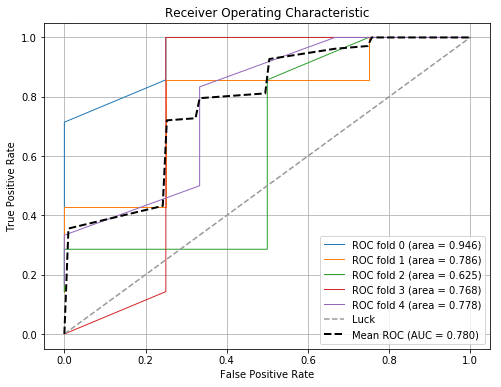

Optimal ROC-AUC threshold: 0.81

Mean ACCURACY: 0.75
Mean PRECISION: 0.78
Mean RECALL: 0.89
Mean F1-SCORE: 0.82


In [74]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['retweetCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *status_count*

In [75]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['status_count'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'status_count']


Optimal ROC-AUC threshold: 0.89

Mean ACCURACY: 0.72
Mean PRECISION: 0.75
Mean RECALL: 0.86
Mean F1-SCORE: 0.79


### Feature excluded: *tweetCount*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'tweetCount']


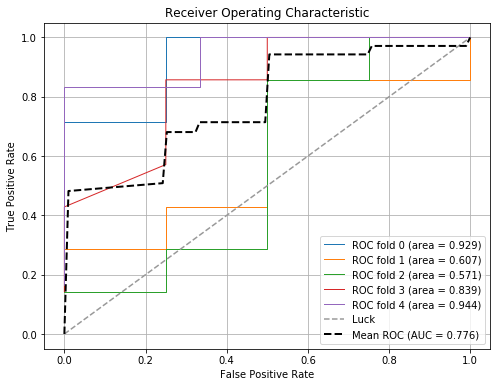

Optimal ROC-AUC threshold: 0.87

Mean ACCURACY: 0.77
Mean PRECISION: 0.79
Mean RECALL: 0.91
Mean F1-SCORE: 0.84


In [76]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['tweetCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature excluded: *urlCount*

In [77]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['urlCount'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'urlCount']


Optimal ROC-AUC threshold: 0.5

Mean ACCURACY: 0.73
Mean PRECISION: 0.76
Mean RECALL: 0.89
Mean F1-SCORE: 0.81


### Feature excluded: *verified*

Training data shape (rows, cols): (53, 14)
Features OUT: ['truth', 'verified']


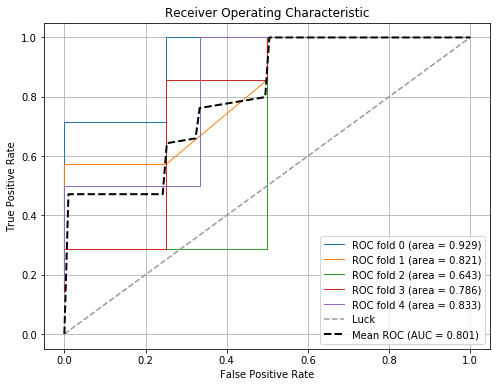

Optimal ROC-AUC threshold: 0.71

Mean ACCURACY: 0.77
Mean PRECISION: 0.78
Mean RECALL: 0.91
Mean F1-SCORE: 0.84


In [78]:
jsonFile = 'data/train.json'
features_out = ["truth"]
features_out.extend(['verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *ages*

In [41]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


Optimal ROC-AUC threshold: 0.28

Mean ACCURACY: 0.635
Mean PRECISION: 0.713
Mean RECALL: 0.717
Mean F1-SCORE: 0.713


### Feature IN: *density*

In [42]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


Optimal ROC-AUC threshold: 0.78

Mean ACCURACY: 0.603
Mean PRECISION: 0.688
Mean RECALL: 0.688
Mean F1-SCORE: 0.686


### Feature IN: *followers*

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


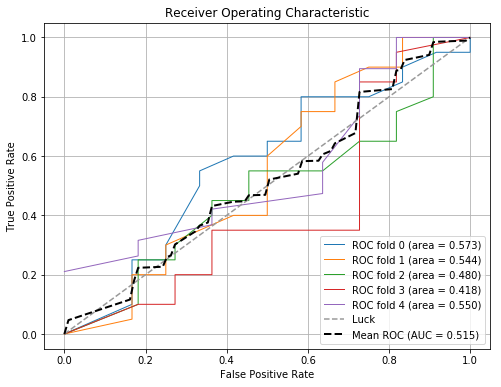

Optimal ROC-AUC threshold: 1.0

Mean ACCURACY: 0.538
Mean PRECISION: 0.624
Mean RECALL: 0.668
Mean F1-SCORE: 0.643


In [43]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *friends*

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


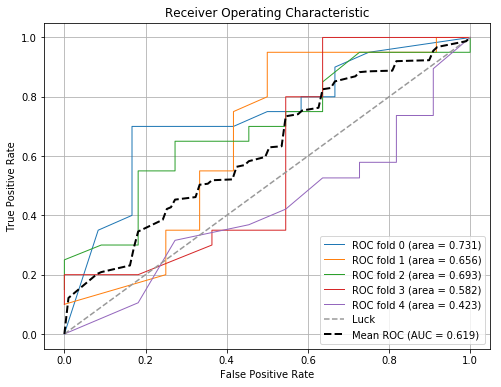

Optimal ROC-AUC threshold: 0.99

Mean ACCURACY: 0.57
Mean PRECISION: 0.666
Mean RECALL: 0.656
Mean F1-SCORE: 0.658


In [44]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *hashtagCount*

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


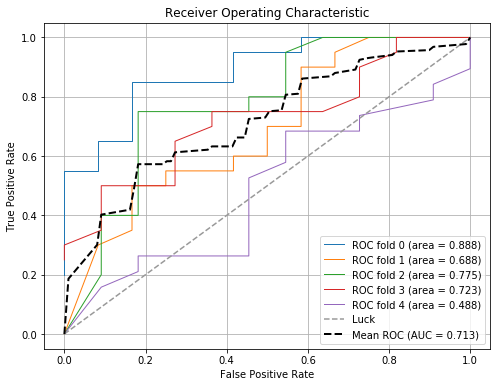

Optimal ROC-AUC threshold: 0.43

Mean ACCURACY: 0.678
Mean PRECISION: 0.761
Mean RECALL: 0.715
Mean F1-SCORE: 0.734


In [45]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *lifespan*

In [46]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


Optimal ROC-AUC threshold: 0.9

Mean ACCURACY: 0.564
Mean PRECISION: 0.654
Mean RECALL: 0.677
Mean F1-SCORE: 0.662


### Feature IN: *mediaCount*

In [47]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


Optimal ROC-AUC threshold: 0.9187

Mean ACCURACY: 0.692
Mean PRECISION: 0.758
Mean RECALL: 0.769
Mean F1-SCORE: 0.757


### Feature IN: *mentionCount*

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


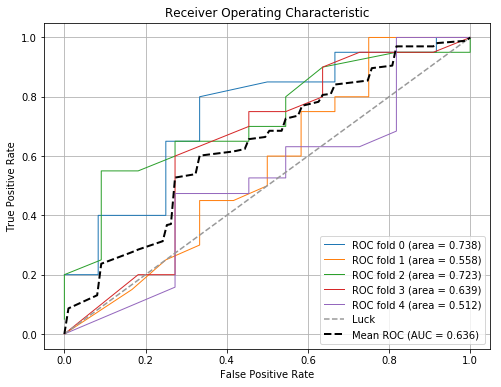

Optimal ROC-AUC threshold: 0.8399

Mean ACCURACY: 0.634
Mean PRECISION: 0.714
Mean RECALL: 0.706
Mean F1-SCORE: 0.71


In [48]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *objectivity*

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


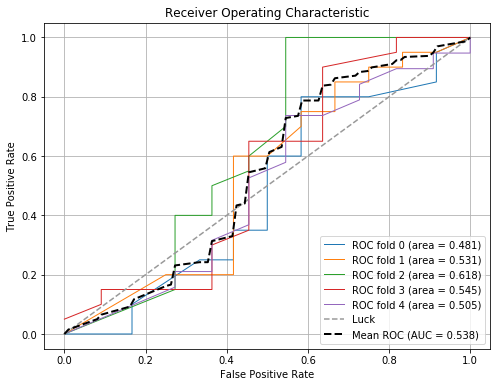

Optimal ROC-AUC threshold: 0.66

Mean ACCURACY: 0.564
Mean PRECISION: 0.666
Mean RECALL: 0.638
Mean F1-SCORE: 0.642


In [49]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *polarity*

In [50]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount', 'verified']


Optimal ROC-AUC threshold: 0.66

Mean ACCURACY: 0.583
Mean PRECISION: 0.692
Mean RECALL: 0.644
Mean F1-SCORE: 0.65


### Feature IN: *retweetCount*

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'status_count', 'tweetCount', 'urlCount', 'verified']


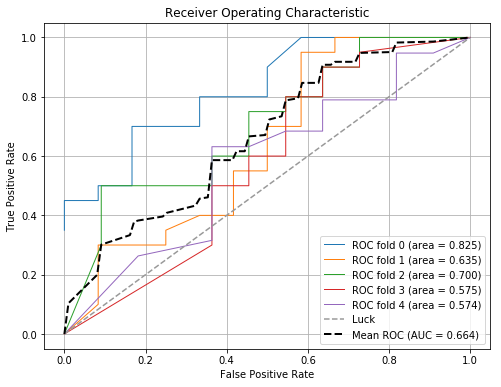

Optimal ROC-AUC threshold: 0.91

Mean ACCURACY: 0.621
Mean PRECISION: 0.698
Mean RECALL: 0.707
Mean F1-SCORE: 0.7


In [51]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'status_count', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *status_count*

In [52]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'tweetCount', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'tweetCount', 'urlCount', 'verified']


Optimal ROC-AUC threshold: 0.31

Mean ACCURACY: 0.614
Mean PRECISION: 0.704
Mean RECALL: 0.675
Mean F1-SCORE: 0.686


### Feature IN: *tweetCount*

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'urlCount', 'verified']


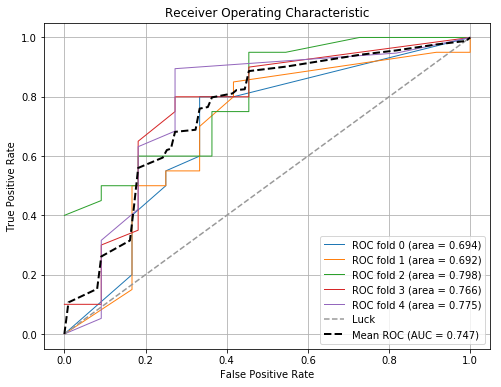

Optimal ROC-AUC threshold: 0.38

Mean ACCURACY: 0.764
Mean PRECISION: 0.805
Mean RECALL: 0.828
Mean F1-SCORE: 0.816


In [53]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'urlCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

### Feature IN: *urlCount*

In [54]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'verified'])

(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'verified']


Optimal ROC-AUC threshold: 0.75

Mean ACCURACY: 0.659
Mean PRECISION: 0.736
Mean RECALL: 0.727
Mean F1-SCORE: 0.729


### Feature IN: *verified*

In [55]:
jsonFile = 'data/normalized_ordered_features.json'
features_out = ["truth"]
features_out.extend(['ages', 'density', 'followers', 'friends', 'hashtagCount',
                     'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity',
                     'retweetCount', 'status_count', 'tweetCount', 'urlCount'])
(xData, yData) = loadFeatures(jsonFile, features_out)

# Random Forest
cls = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

metrics_calc(cls, xData, yData)

Training data shape (rows, cols): (156, 1)
Features OUT: ['truth', 'ages', 'density', 'followers', 'friends', 'hashtagCount', 'lifespan', 'mediaCount', 'mentionCount', 'objectivity', 'polarity', 'retweetCount', 'status_count', 'tweetCount', 'urlCount']


Optimal ROC-AUC threshold: 0.5317

Mean ACCURACY: 0.776
Mean PRECISION: 0.847
Mean RECALL: 0.789
Mean F1-SCORE: 0.815
